####Assignment-04-Simple Linear Regression-1

---


### 1) Delivery_time -> Predict delivery time using sorting time

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
delivery_time  = pd.read_csv('/content/delivery_time.csv')#read File
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Feature engineering

In [3]:
delivery_time=delivery_time.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)#reshape
delivery_time.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA and Data Visualization 

In [4]:
delivery_time.shape

(21, 2)

In [5]:
delivery_time.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [6]:
delivery_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
delivery_time.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [9]:
delivery_time.duplicated().sum()

0

In [10]:
delivery_time.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

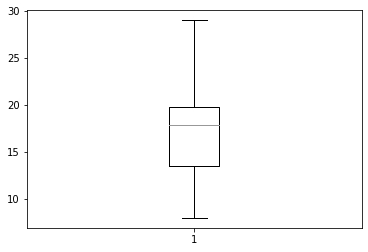

<Figure size 720x504 with 0 Axes>

In [11]:
plt.boxplot(delivery_time['Delivery_Time'])# using Matplotlib
plt.figure(figsize=(10,7))
plt.show()

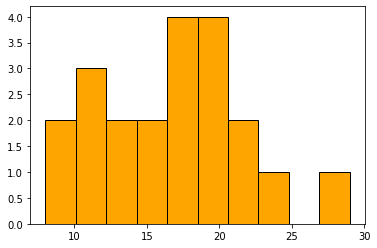

In [12]:
plt.hist(delivery_time['Delivery_Time'], color= "Orange", edgecolor = "black")
plt.show()


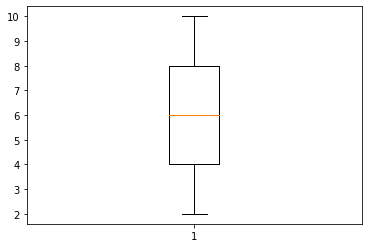

<Figure size 720x504 with 0 Axes>

In [13]:
plt.boxplot(delivery_time['Sorting_Time'])
plt.figure(figsize=(10,7))
plt.show()

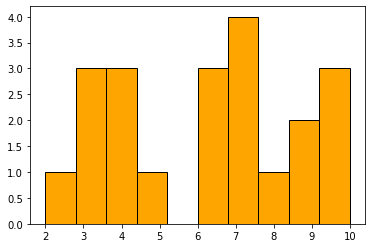

In [14]:
plt.hist(delivery_time['Sorting_Time'], color= "Orange", edgecolor = "black")
plt.show()

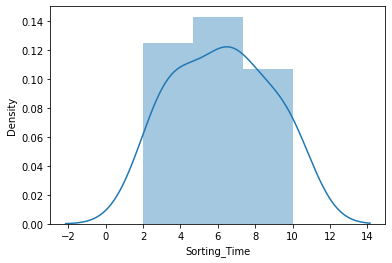

In [15]:
sns.distplot(delivery_time['Sorting_Time'])
plt.show()

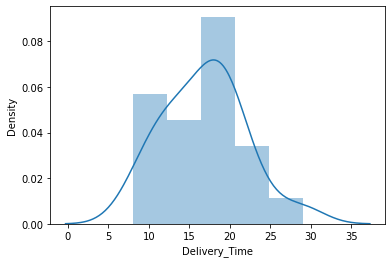

In [16]:
sns.distplot(delivery_time['Delivery_Time'])
plt.show()

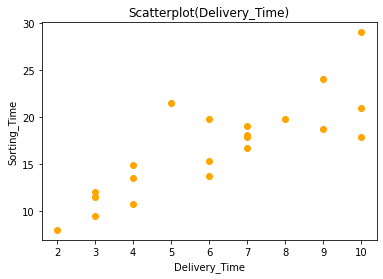

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery_Time, dtype: float64

In [17]:
plt.scatter(x=delivery_time['Sorting_Time'], y=delivery_time['Delivery_Time'], c= "orange")
plt.xlabel("Delivery_Time")
plt.ylabel("Sorting_Time")
plt.title("Scatterplot(Delivery_Time)")
plt.show()
delivery_time['Delivery_Time']


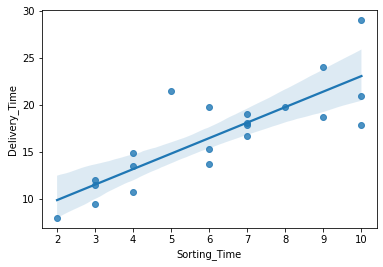

In [18]:
sns.regplot(delivery_time['Sorting_Time'],delivery_time['Delivery_Time'])
plt.show()

In [19]:
delivery_time.corr()# find correlation 

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [20]:
import statsmodels.formula.api as smf# model Building
model = smf.ols("Delivery_Time~Sorting_Time", data = delivery_time).fit()

In [21]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        05:03:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [24]:
model.rsquared

0.6822714748417231

In [25]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [26]:
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [27]:
pred = model.predict(delivery_time.Sorting_Time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [28]:
#print(model.conf_int(0.05))
rmse_lin = np.sqrt(np.mean((np.array(delivery_time['Delivery_Time'])-np.array(pred))**2))
rmse_lin   

2.7916503270617654

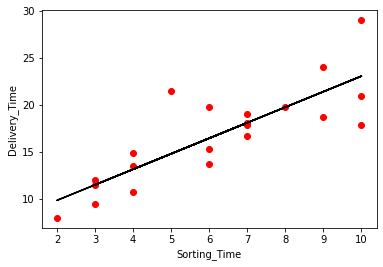

In [29]:
#import matplotlib.pylab as plt
plt.scatter(x=delivery_time.iloc[:,-1],y=delivery_time.iloc[:,:-1],color='red')
plt.plot(delivery_time.Sorting_Time,pred,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()

####Transformation

In [30]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=delivery_time).fit()
#model2.params
#model2.resid 
#model2.resid_pearson 

In [31]:
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        05:03:59   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred2 = model2.predict(pd.DataFrame(delivery_time['Sorting_Time'])) 
pred2  

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [33]:
rmse_log = np.sqrt(np.mean((np.array(delivery_time['Delivery_Time'])-np.array(pred2))**2))
rmse_log  

2.733171476682066

In [34]:
pred2.corr(delivery_time.Delivery_Time)

0.8339325279256242

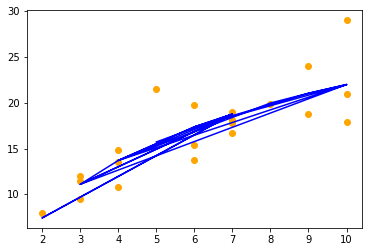

In [35]:
plt.scatter(x= delivery_time.Sorting_Time, y=delivery_time.Delivery_Time, color = "Orange")
plt.plot(delivery_time.Sorting_Time,pred2, color = "blue")
plt.show("Sorting_Time")
plt.show("Delivery_Time")
plt.show()

In [36]:
#exponential model
model3 = smf.ols('np.log(Delivery_Time)~Sorting_Time',data=delivery_time).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 25 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           05:03:59   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
pred_log = model3.predict(pd.DataFrame(delivery_time['Sorting_Time']))


In [38]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [39]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [40]:
rmse_exp = np.sqrt(np.mean((np.array(delivery_time['Delivery_Time'])-np.array(pred3))**2)) 
rmse_exp 

2.9402503230562007

In [41]:
pred3.corr(delivery_time.Delivery_Time)

0.8085780108289259

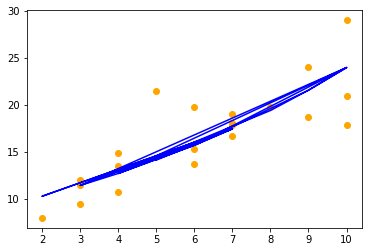

In [42]:
plt.scatter(x= delivery_time.Sorting_Time, y=delivery_time.Delivery_Time, color = "Orange")
plt.plot(delivery_time.Sorting_Time,pred3, color = "blue")
plt.show("Sorting_Time")
plt.show("Delivery_Time")
plt.show()

In [43]:
new_resid = model3.resid_pearson 
new_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

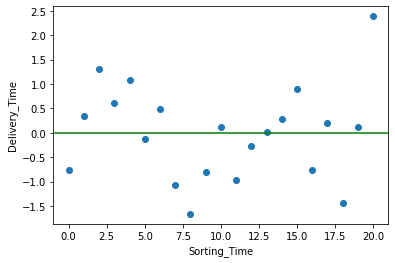

In [44]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show() 

Text(0, 0.5, 'Actual')

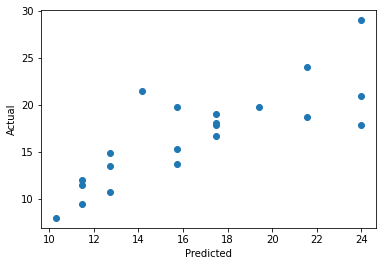

In [45]:
plt.scatter(x=pred3,y=delivery_time.Delivery_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [46]:
delivery_time["Sorting_Time_Sq"] = delivery_time.Sorting_Time*delivery_time.Sorting_Time
delivery_time

,Delivery_Time,Sorting_Time,Sorting_Time_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [47]:
model_quad = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_Sq",data=delivery_time).fit()
#model_quad.params 

In [48]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sun, 25 Dec 2022   Prob (F-statistic):           2.20e-06
Time:                           05:04:00   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred_quad = model_quad.predict(delivery_time)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [50]:
rmse_quad = np.sqrt(np.mean((np.array(delivery_time['Delivery_Time'])-np.array(pred4))**2))
rmse_quad 

2.7990419887409317

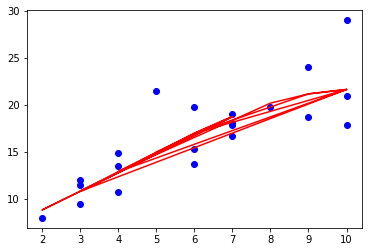

In [51]:
plt.scatter(delivery_time.Sorting_Time,delivery_time.Delivery_Time,c="b")
plt.plot(delivery_time.Sorting_Time,pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

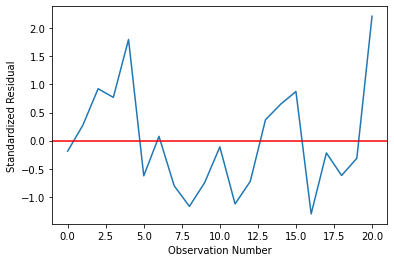

In [52]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   

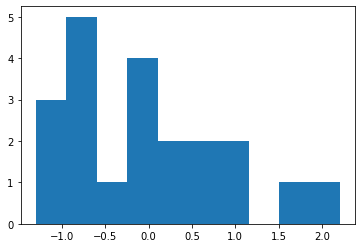

In [53]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [54]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


In [55]:
print(plt.style.available)  

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [56]:
import matplotlib.pyplot as plt
plt.style.use('classic')     

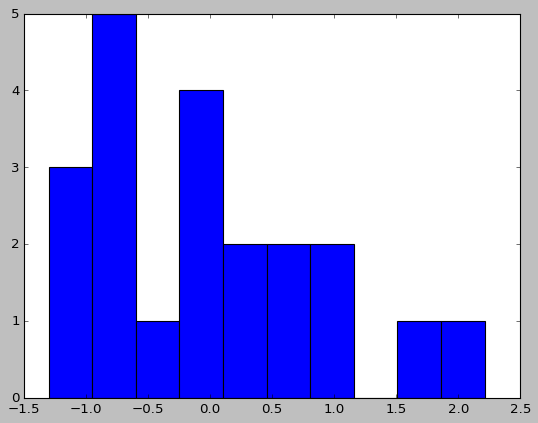

In [57]:
plt.hist(model_quad.resid_pearson)  
plt.show() 

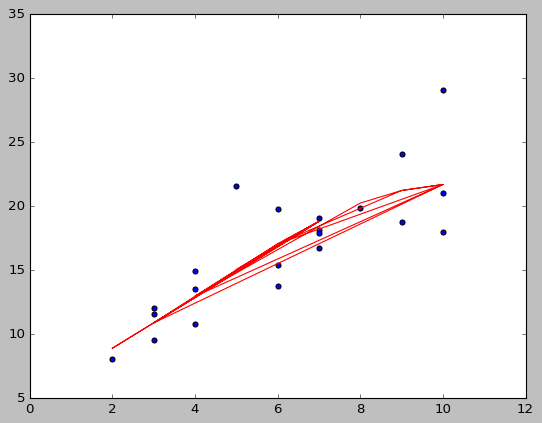

In [58]:
plt.scatter(delivery_time.Sorting_Time,delivery_time.Delivery_Time,c="b")
plt.plot(delivery_time.Sorting_Time,pred4,"r")

####Model Predictions

In [59]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [60]:
data=pd.DataFrame(new_data,columns=['Sorting_Time'])
data

,Sorting_Time
0,5
1,8


In [61]:
model3.predict(data)

0    2.649130
1    2.965785
dtype: float64

####Assignment-04-Simple Linear Regression-2



---
2) Salary_hike -> Build a prediction model for Salary_hike



In [62]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import seaborn as sns

In [63]:
# import dataset
salary_data=pd.read_csv('/content/Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


####EDA and Data Visualization

In [64]:
salary_data.shape

(30, 2)

In [65]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [66]:
salary_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [67]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [68]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [69]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [70]:
salary_data.duplicated().sum()

0

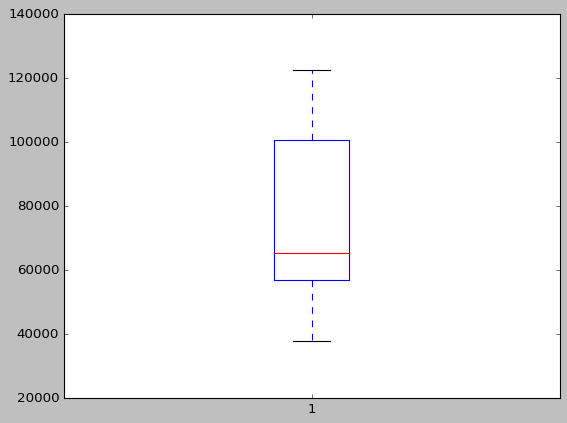

In [71]:
plt.boxplot(salary_data['Salary'])
plt.show()

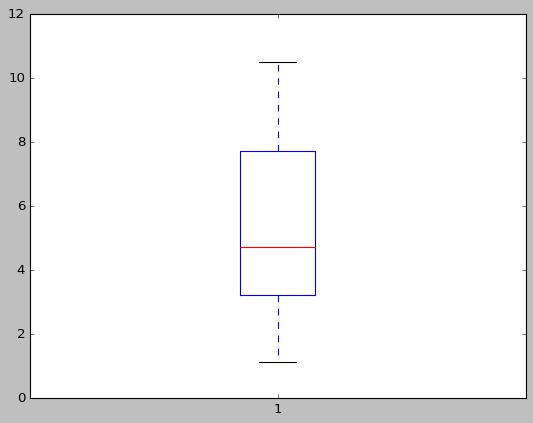

In [72]:
plt.boxplot(salary_data['YearsExperience'])
plt.show()

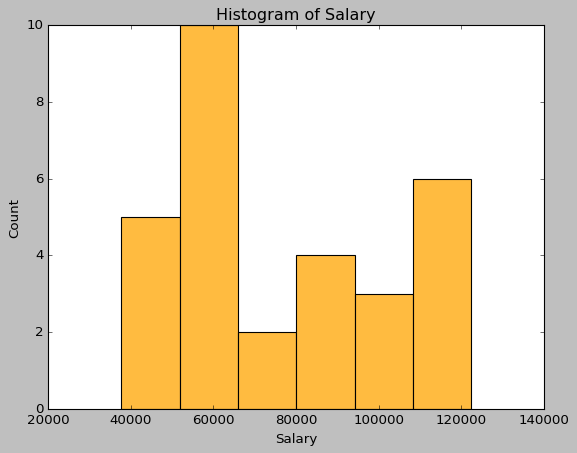

In [73]:
sns.histplot(salary_data['Salary'], color= "orange")
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.show()

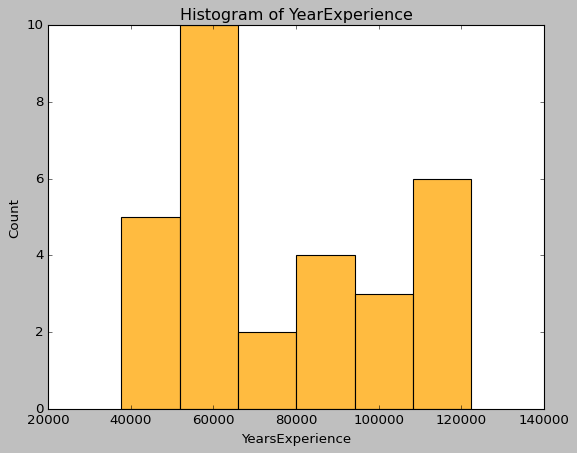

In [74]:
sns.histplot(salary_data['Salary'], color= "orange")
plt.title("Histogram of YearExperience")
plt.xlabel("YearsExperience")
plt.show()

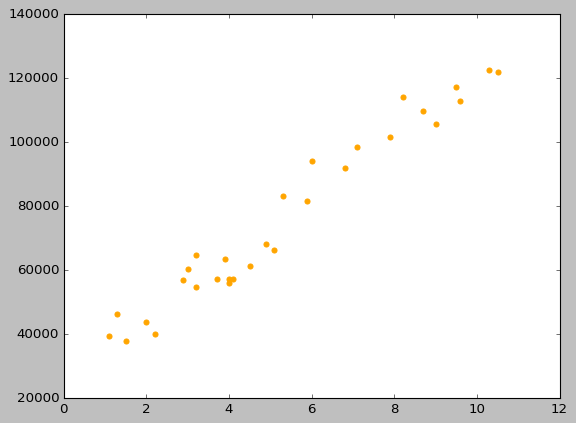

In [75]:
plt.scatter(salary_data.YearsExperience, salary_data.Salary,color = "orange")
plt.show()

In [76]:
salary_data.corr()# find Correlation 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [77]:
#model Building
model = smf.ols("Salary~YearsExperience", data = salary_data).fit() 

In [78]:
#coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        05:04:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [81]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

#####Model Predictions

In [82]:
pred = model.predict(salary_data.YearsExperience)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [83]:
model.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [84]:
rmse_lin = np.sqrt(np.mean((np.array(salary_data['Salary'])-np.array(pred))**2))
rmse_lin   

5592.043608760662

Text(0, 0.5, 'Salary')

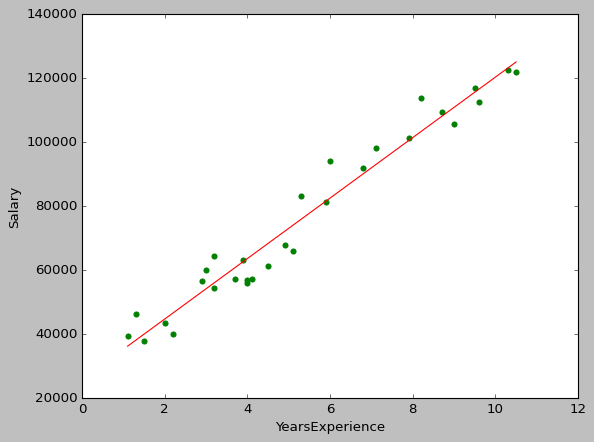

In [85]:
#import matplotlib.pylab as plt
plt.scatter(x=salary_data['YearsExperience'],y=salary_data['Salary'],color='green')
plt.plot(salary_data['YearsExperience'],pred,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary') 

In [86]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=salary_data).fit()

In [87]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        05:04:02   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
pred2 = model2.predict(pd.DataFrame(salary_data['YearsExperience'])) 
pred2  

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [89]:
rmse_log = np.sqrt(np.mean((np.array(salary_data['Salary'])-np.array(pred2))**2))
rmse_log  

10302.893706228302

In [90]:
pred2.corr(salary_data.Salary)

0.9240610817882642

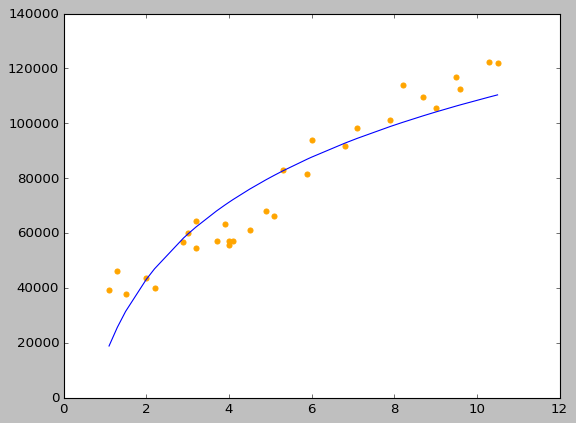

In [91]:
plt.scatter(x= salary_data.YearsExperience, y=salary_data.Salary, color = "Orange")
plt.plot(salary_data.YearsExperience,pred2, color = "blue")
plt.show("YearsExperience")
plt.show("Salary")
plt.show()

In [92]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=salary_data).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        05:04:03   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
pred_log = model3.predict(pd.DataFrame(salary_data['YearsExperience']))

In [94]:
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [95]:
pred3=np.exp(pred_log)  
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [96]:
rmse_exp = np.sqrt(np.mean((np.array(salary_data['Salary'])-np.array(pred3))**2)) 
rmse_exp 

7213.235076620168

In [97]:
pred3.corr(salary_data.Salary)

0.9660469705377086

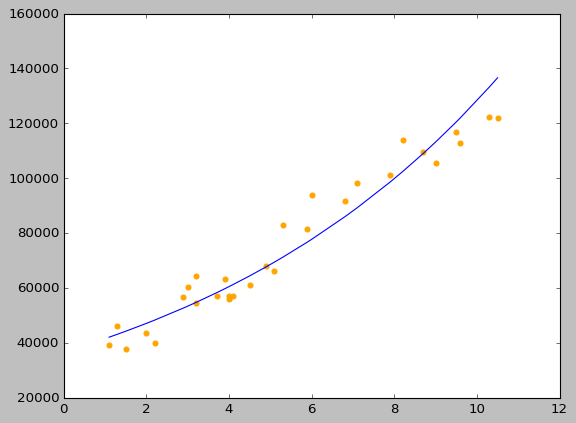

In [98]:
plt.scatter(x= salary_data.YearsExperience, y=salary_data.Salary, color = "Orange")
plt.plot(salary_data.YearsExperience,pred3, color = "blue")
plt.show("YearsExperience")
plt.show("Salary")
plt.show()

In [99]:
new_resid = model3.resid_pearson 
new_resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

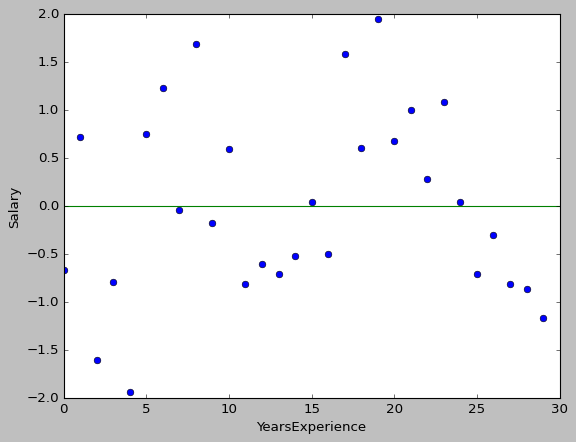

In [100]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show() 

Text(0, 0.5, 'Actual')

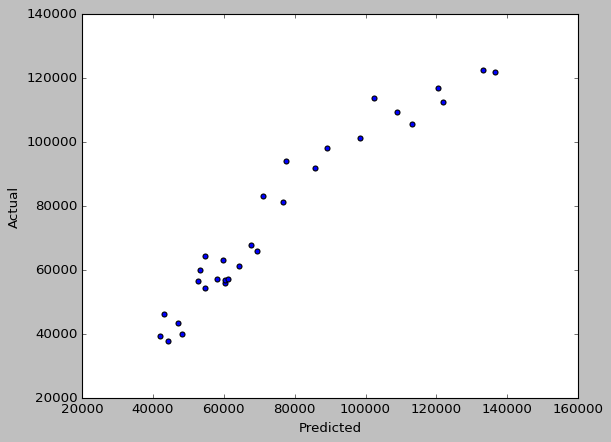

In [101]:
plt.scatter(x=pred3,y=salary_data.Salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [102]:
salary_data["YearsExperience_Sq"] = salary_data.YearsExperience*salary_data.YearsExperience
salary_data

,YearsExperience,Salary,YearsExperience_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [103]:
model_quad = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Sq",data=salary_data).fit()
#model_quad.params 

In [104]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           3.95e-18
Time:                        05:04:04   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
pred_quad = model_quad.predict(salary_data)
pred4=np.exp(pred_quad)  
pred4

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [106]:
rmse_quad = np.sqrt(np.mean((np.array(salary_data['Salary'])-np.array(pred4))**2))
rmse_quad 

5391.081582693594

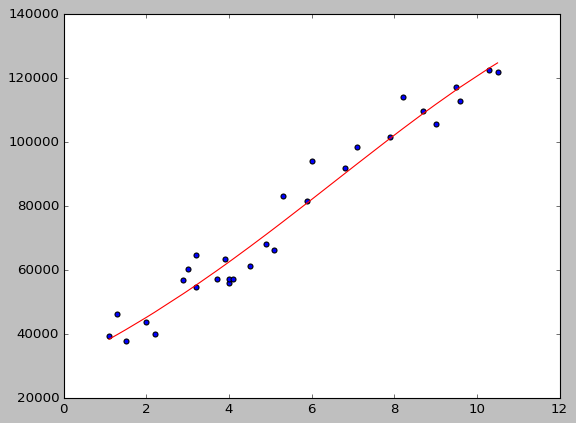

In [107]:
plt.scatter(salary_data.YearsExperience,salary_data.Salary,c="b")
plt.plot(salary_data.YearsExperience,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

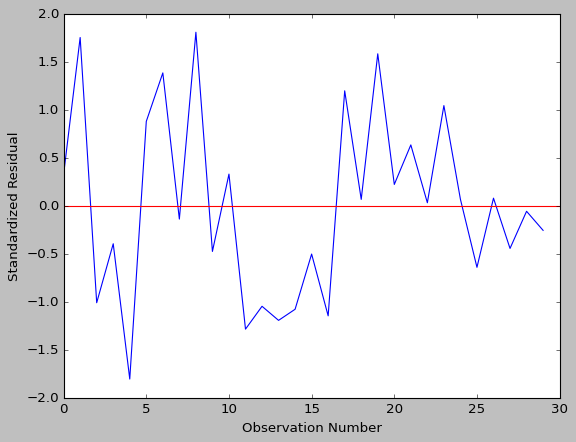

In [108]:
plt.plot(np.arange(30),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   

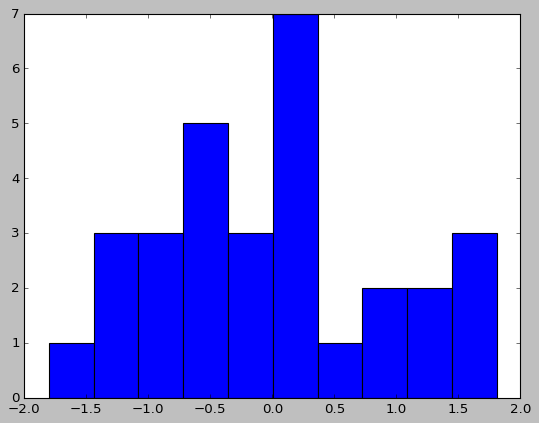

In [109]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [110]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


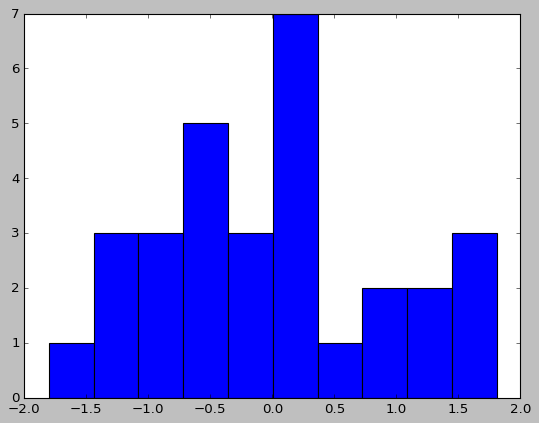

In [111]:
plt.hist(model_quad.resid_pearson)  
plt.show() 

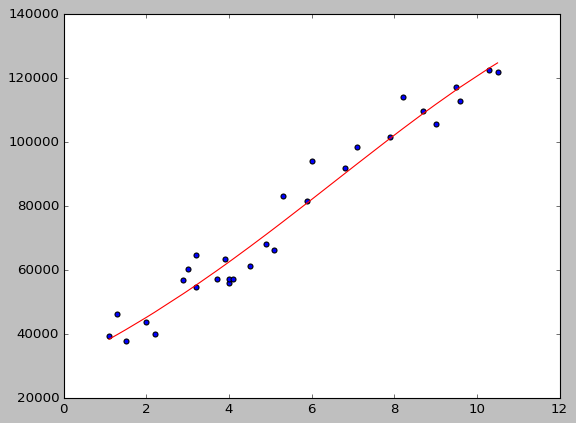

In [112]:
plt.scatter(salary_data.YearsExperience,salary_data.Salary,c="b")
plt.plot(salary_data.YearsExperience,pred4,"r")

####Model Predction

In [113]:
# random dataset
data=pd.Series([1,2.2,1.5,2,3,4,1.3,2.4,0.9,0.5,9,3.3,3])

In [114]:
pred_data=pd.DataFrame(data,columns=["YearsExperience"])
pred_data.head(5)

,YearsExperience
0,1.0
1,2.2
2,1.5
3,2.0
4,3.0


In [115]:
model.predict(pred_data)

0      35242.162520
1      46582.117306
2      39967.143681
3      44692.124842
4      54142.087163
5      63592.049484
6      38077.151217
7      48472.109770
8      34297.166288
9      30517.181359
10    110841.861092
11     56977.075859
12     54142.087163
dtype: float64